#Let's note some of the important take-aways here re: Gini and Entropy!#

 Gini and entropy are both functions that measure purity based on class/category proportions. (ie. what proportion is in class 1 vs class 2). 

They are at their highest (Gini = 0.5 and entropy = 1) when we have a balanced set of data belonging to 2 classes evenly (50/50). Anything higher or lower than a 50/50 split will result in a lower gini and entropy.

Information gain is a way for us to figure out how much information is contained within the resulting X from P(y | X = condition). IG closer to 1 is desirable, unlike Gini or Entropy on its own.  IG is the weighed sum of either Gini or Entropy of all conditions for a node.

In decision tree and random forest classifiers, there is a parameter you can tune called criterion. This is where you can choose (or gridsearch over) the function to measure the quality of a split. Gini is the default.   http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Structure of a decision tree:
    
    Decision trees have three main parts: a root node, leaf nodes and branches. 
    
    The root node is the starting point of the tree, 
    and both root and leaf nodes contain questions or criteria to be answered. 
    Branches are arrows connecting nodes, showing the flow from question to answer. 
    
    Each node typically has two or more nodes extending from it. For example, if the question in the first node requires a "yes" or "no" answer, there will be one leaf node for a "yes" response, and another node for "no.

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Visualizing CARTs with admissions data

_Authors: Kiefer Katovich (SF)_

---

Using the admissions data from earlier in the course, build CARTs, look at how they work visually, and compare their performance to more standard, parametric models.


---

### 1. Install and load the packages required to visually show decision tree branching

You will need to first:

1. Install `graphviz` with homebrew (on OSX - not sure what linux uses). The command will be `brew install graphviz`
- Install `pydotplus` with `pip install pydotplus`
- Load the packages as shown below (you may need to restart the kernel after the installations.)

In [14]:
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

---

### 2. Load in admissions data and other python packages

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
admit = pd.read_csv('../datasets/admissions.csv')

---

### 3. Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

In [17]:
# focus on data we have for the time being.
# dont want to spend an unessary amount of time cleaning.
admit = admit.dropna()

In [18]:
admit.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [19]:
Xr = admit[['admit','gre','prestige']]
yr = admit.gpa.values

Xc = admit[['gpa','gre','prestige']]
yc = admit.admit.values

---

### 4. Cross-validate regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic for the classification problem. Cross-validate the R2 and accuracy scores.

In [20]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [21]:
# cross val Linear Reg with 4 folds
reg_scores = cross_val_score(LinearRegression(), Xr, yr, cv=4)
# cross val Log Reg with 4 folds
cls_scores = cross_val_score(LogisticRegression(), Xc, yc, cv=4)

#get scores
print(reg_scores, np.mean(reg_scores))
print(cls_scores, np.mean(cls_scores))

# fit models
linreg = LinearRegression().fit(Xr, yr) #R2
logreg = LogisticRegression().fit(Xc, yc) #accuracy

[ 0.22470964  0.08296819  0.03204903  0.16434809] 0.12601873539
[ 0.71        0.72        0.68686869  0.70408163] 0.70523757988


_Linear regression is overall terrible, Log reg is not bad...not great either_

---

### 5. Building regression trees

With `DecisionTreeRegressor`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
# set 4 models
dtr1 = DecisionTreeRegressor(max_depth=1)
dtr2 = DecisionTreeRegressor(max_depth=2)
dtr3 = DecisionTreeRegressor(max_depth=3)
dtrN = DecisionTreeRegressor(max_depth=None)

In [24]:
# fit the 4 models
dtr1.fit(Xr, yr)
dtr2.fit(Xr, yr)
dtr3.fit(Xr, yr)
dtrN.fit(Xr, yr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
# cross validate the 4 models
dtr1_scores = cross_val_score(dtr1, Xr, yr, cv=4)  #depth of 1
dtr2_scores = cross_val_score(dtr2, Xr, yr, cv=4)   #depth of 2
dtr3_scores = cross_val_score(dtr3, Xr, yr, cv=4)    #depth of 3
dtrN_scores = cross_val_score(dtrN, Xr, yr, cv=4)    #no max depth (goes all the way down the tree)

# score the 4 models
print(dtr1_scores, np.mean(dtr1_scores))
print(dtr2_scores, np.mean(dtr2_scores))
print(dtr3_scores, np.mean(dtr3_scores))
print(dtrN_scores, np.mean(dtrN_scores))

[ 0.16618105  0.1535036   0.03860296  0.10081223] 0.114774961104
[ 0.20722899  0.14179888  0.04112242  0.11836674] 0.127129257986
[ 0.15422529  0.123802    0.05252648  0.08070045] 0.102813557478
[-0.1467712  -0.15842446 -0.46738791 -0.19259235] -0.241293978006


---

### 6. Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node


_For reference: this method of showing the model creates a output file using graphviz that then gets read in using pydotplus._

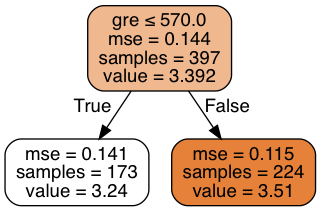

In [57]:
# TEMPLATE CODE
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

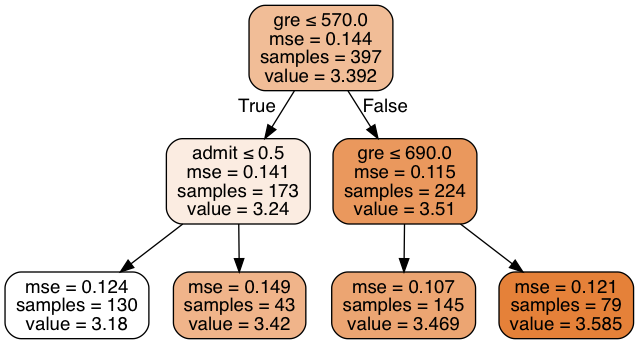

In [56]:
# max depth = 2
dot_data = StringIO()  

export_graphviz(dtr2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

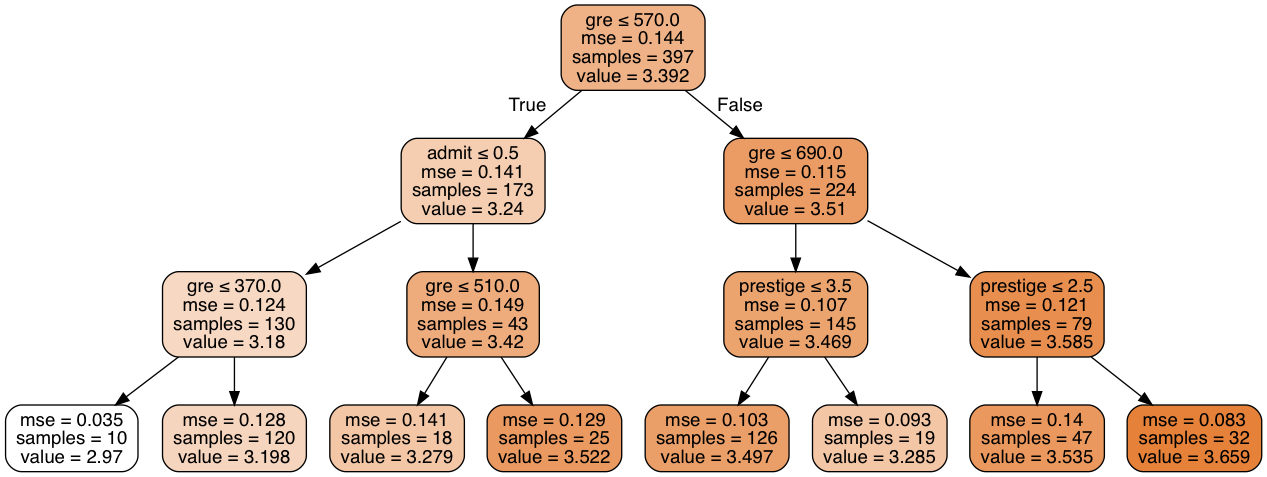

In [28]:
# max depth = 3
dot_data = StringIO()  

export_graphviz(dtr3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [29]:
# max_depth = none 
# keeps creating trees until purity = 1
dot_data = StringIO()  

export_graphviz(dtrN, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


---

### 7. Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
# set 4 trees
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)
dtcN = DecisionTreeClassifier(max_depth=None)

In [32]:
# fit 4 trees
dtc1.fit(Xc, yc)
dtc2.fit(Xc, yc)
dtc3.fit(Xc, yc)
dtcN.fit(Xc, yc)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
# use CV to evaluate the 4 trees
dtc1_scores = cross_val_score(dtc1, Xc, yc, cv=4)
dtc2_scores = cross_val_score(dtc2, Xc, yc, cv=4)
dtc3_scores = cross_val_score(dtc3, Xc, yc, cv=4)
dtcN_scores = cross_val_score(dtcN, Xc, yc, cv=4)

print(dtc1_scores, np.mean(dtc1_scores))
print(dtc2_scores, np.mean(dtc2_scores))
print(dtc3_scores, np.mean(dtc3_scores))
print(dtcN_scores, np.mean(dtcN_scores))

[ 0.68        0.68        0.66666667  0.68367347] 0.677585034014
[ 0.69        0.77        0.62626263  0.62244898] 0.677177901464
[ 0.77        0.77        0.60606061  0.70408163] 0.712535559678
[ 0.61        0.64        0.57575758  0.54081633] 0.591643475572


*Classification does much better than its counterparts.  We can start to see how achieving completely pure leaves creates overfitting as `max_depth = none` is the worse performing model.*

---

### 8. Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

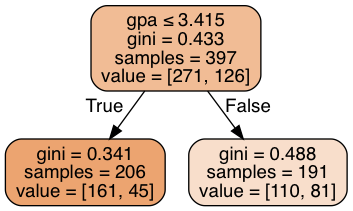

In [53]:
# max_depth = 1
dot_data = StringIO()  

export_graphviz(dtc1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

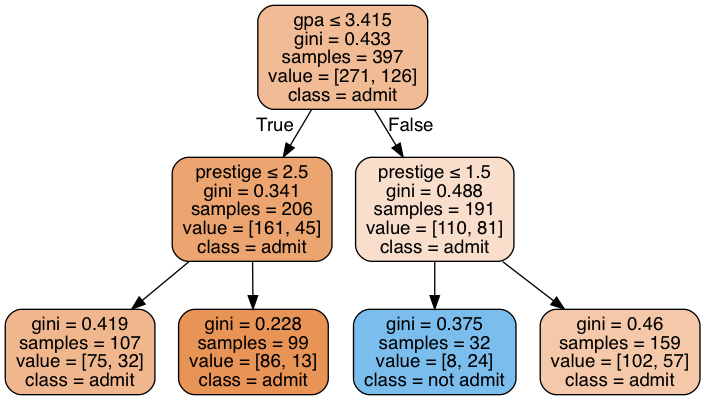

In [52]:
# max_depth = 2
dot_data = StringIO()  

export_graphviz(dtc2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False,
                feature_names=Xc.columns,
               class_names =['admit', 'not admit'])  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

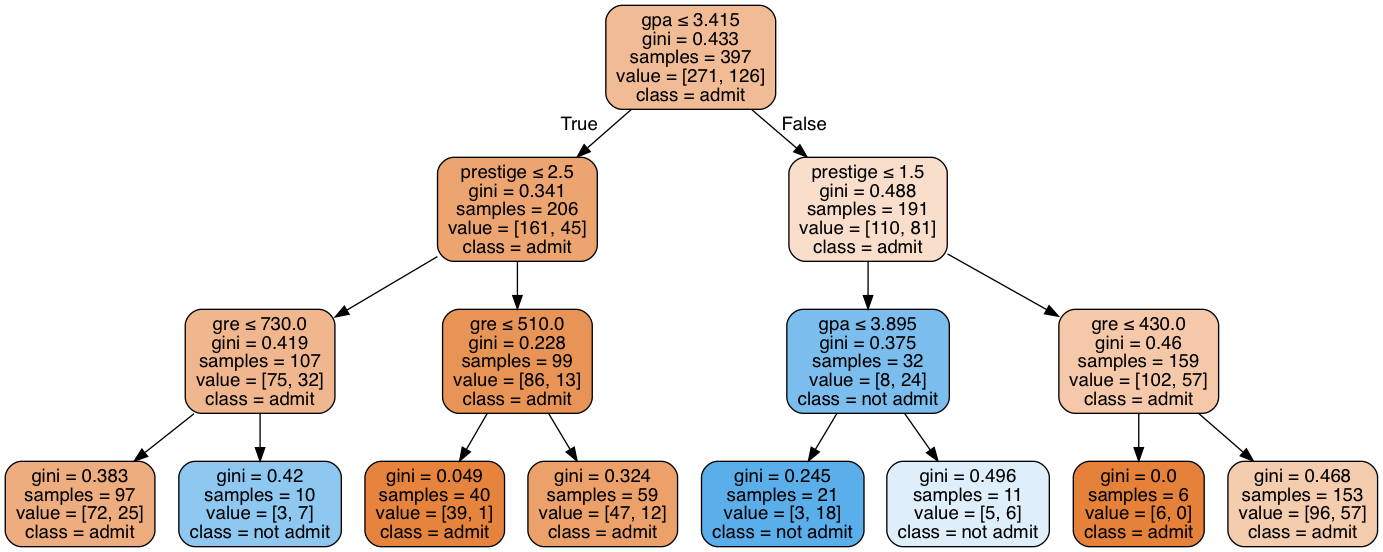

In [51]:
# max_depth = 3
dot_data = StringIO()  

export_graphviz(dtc3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False,
                feature_names=Xc.columns,
               class_names=['admit', 'not admit'])  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [ ]:
dot_data = StringIO()  

export_graphviz(
    model, 
    out_file = dot_data,  
    filled=True, rounded=True, proportion=False,
    special_characters=True, 
    feature_names=food_encoded.columns,
    class_names=["Bacon", "Vegetable"]
)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())  

In [48]:
# max_depth = 4
dot_data = StringIO()  

export_graphviz(dtcN, out_file=dot_data,  
                filled=True, rounded=True, proportion=False,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


_Thats alot of decisions!_

---

### 9. Using GridSearchCV to find the best decision tree classifier

As decision trees that are unrestricted will just end up over fitting the training data. Decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting the how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

#### Switch over to the college stats dataset

We are going to be predicting whether or not a college is public or private. Set up your X, y variables accordingly.

In [38]:
col = pd.read_csv('../datasets/College.csv')

In [39]:
col.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [40]:
y = col.Private.map(lambda x: 1 if x == 'Yes' else 0)
X = col.iloc[:, 2:]

---

### 10. Set up and run the gridsearch on the data

In [ ]:
# Max Features: #ThThe maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#     If “sqrt”, then max_features=sqrt(n_features)
#     If “log2”, then max_features=log2(n_features)
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
#min_samples_split: The minimum number of samples required to split an internal node

In [41]:
# gridsearch params
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]   #The minimum number of samples required to split an internal node
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5, verbose=1)

In [42]:
# use the gridearc C model to fit the data
dtc_gs.fit(X, y)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [43]:
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 4, 'max_features': 5, 'min_samples_split': 3}
0.924066924067


In [45]:
# quite the improvement in scores

---

### 11. Print out the "feature importances"

The model has an attribute called `.feature_importances_` which can tell us which features were most important vs. others. It ranges from 0 to 1, with 1 being the most important.

An easy way to think about the feature importance is how much that particular variable was used to make decisions. Really though, it also takes into account how much that feature contributed to splitting up the class or reducing the variance.

A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, show the feature importances for each variable predicting private vs. not, sorted by most important feature to least.

In [46]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
13,S.F.Ratio,0.381424
7,Outstate,0.203148
6,P.Undergrad,0.176843
1,Accept,0.106663
5,F.Undergrad,0.046684
0,Apps,0.045910
2,Enroll,0.025469
8,Room.Board,0.013860
4,Top25perc,0.000000
9,Books,0.000000


In [47]:
# Looks like there about 7 features do not help make decisions.